<a href="https://colab.research.google.com/github/mateussdreis/estatistica-com-python/blob/main/Conceitos_estat%C3%ADsticos_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
from scipy import stats
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns

## Base de dados

In [20]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projeto dados/estatistica/Aula 01/vazao_canal.csv', sep = ';', decimal = ',')
df1 = df1.set_index('dado')
display(df1)

,volume,tempo
dado,,
1,10.0,4.31
2,11.5,5.72
3,10.0,5.00
4,8.5,4.38
5,11.0,5.31
6,8.0,4.56
7,9.0,5.00
8,10.5,5.78
9,10.0,5.88


## Medidas de tendência central

São valores únicos que tentam descrever um conjunto de dados identificando o valor central ou “típico” desse conjunto de dados.

In [21]:
df1.describe()

,volume,tempo
count,10.000000,10.000000
mean,9.850000,5.178000
std,1.081409,0.618256
min,8.000000,4.310000
25%,9.250000,4.670000
50%,10.000000,5.155000
75%,10.375000,5.765000
max,11.500000,5.880000


In [22]:
mediana_df1 = df1[['volume', 'tempo']].median()
print(f'Os valores medianos são: \n {mediana_df1}')

Os valores medianos são: 
 volume    10.000
tempo      5.155
dtype: float64


Agora será usado a média aparada, com o intuito de cortar os efeitos dos outliers na base de dados.

In [18]:
medias_aparadas_df1 = stats.trim_mean(df1[['volume', 'tempo']], 0.1)
print(f'As médias aparadas são: \n {medias_aparadas_df1}')

As médias aparadas são: 
 [9.875   5.19875]


essa media aparada é interessante se utilizar apenas em pequenos volumes de dados, visto que em grandes volumes de dados os valores não são tão afetados pela presença de outliers.

### Quartis

O primeiro quartil é o primeiro quarto dos dados: 25% dos valores estão abaixo dele.


In [28]:
percentil25_v = np.percentile(df1['volume'],25)
percentil25_t = np.percentile(df1['tempo'],25)
print('A mediana das variáveis volume e tempo são, respectivamente, {:.3f}'.format(percentil25_v),'e {:.3f}'.format(percentil25_t))

A mediana das variáveis volume e tempo são, respectivamente, 9.250 e 4.670


## Medidores de dispersão

São medidas utilizadas para indicar o grau de variação dos elementos de um conjunto numérico em relação à sua média

* **desvio** é a diferença entre cada ponto e a média - $(x_i - \overline{x})$;
* **erro total** é a soma dos desvios $\sum_{i}(x_i - \overline{x})$;
* Para evitar o erro direcionado, faz-se a soma ao **quadrado dos erros** (SS): $\sum_{i}(x_i - \overline{x})^2$;
* **Variância** é a soma do quadrado dos desvios dividida pelos graus de liberdade:
$$s^2=\dfrac{\sum (x_i - \overline{x})}{N-1}$$




In [29]:
variancia_v = st.variance(df1['volume'])
variancia_t = st.variance(df1['tempo'])
print('A variância das variáveis volume e tempo são, respectivamente, {:.3f}'.format(variancia_v),'e {:.3f}'.format(variancia_t))

A variância das variáveis volume e tempo são, respectivamente, 1.169 e 0.382


* o **desvio padrão** é a raiz da variância  e representa o quão bem a média representa os dados.
$$s=\sqrt{\dfrac{\sum (x_i - \overline{x})}{N-1}}$$

In [30]:
desvip_v = st.stdev(df1['volume'])
desvip_t = st.stdev(df1['tempo'])
print('O desvio padrão das variáveis volume e tempo são, respectivamente, {:.3f}'.format(desvip_v),'e {:.3f}'.format(desvip_t))

O desvio padrão das variáveis volume e tempo são, respectivamente, 1.081 e 0.618


* O **coeficiente de variação** é a razão entre o desvio-padrão e a média, indicando sua dispersão;
* Como é muito afetado pela escala, somente se usa para comparar variáveis semelhantes.

$$c_v = \dfrac{s}{\overline{x}}$$


In [31]:
coef_v_volume = desvip_v/np.mean(df1['volume'])
coef_v_tempo = desvip_t/np.mean(df1['tempo'])
print('O coeficiente de variação das variáveis volume e tempo são, respectivamente, {:.3f}'.format(coef_v_volume),'e {:.3f}'.format(coef_v_tempo))

O coeficiente de variação das variáveis volume e tempo são, respectivamente, 0.110 e 0.119


## Tabela de frequências e histogramas


São ferramentas que ajudam na compreensão da frequência (contagem) de uma variável.

* A **moda** é o valor que aparece com mais frequência;
* Quando uma distribuição possui duas modas, ela é chamada de bimodal;
* Em dados agrupados, a moda representa o pico da curva de distribuição de frequência;
* Em uma **distribuição perfeitamente simétrica**, a média, a mediana e a moda serão iguais;
* Não só o formato da distribuição é importante, mas também as anomalias relativas a assimetria;
Para dados agrupados, a média de todas as observações em um dado grupo é o ponto médio do grupo;





In [53]:
tabela_f_tempo = pd.DataFrame(df1['tempo'].value_counts())
display(tabela_f_tempo)

,count
tempo,
5.00,2
4.31,1
5.72,1
4.38,1
5.31,1
4.56,1
5.78,1
5.88,1
5.84,1


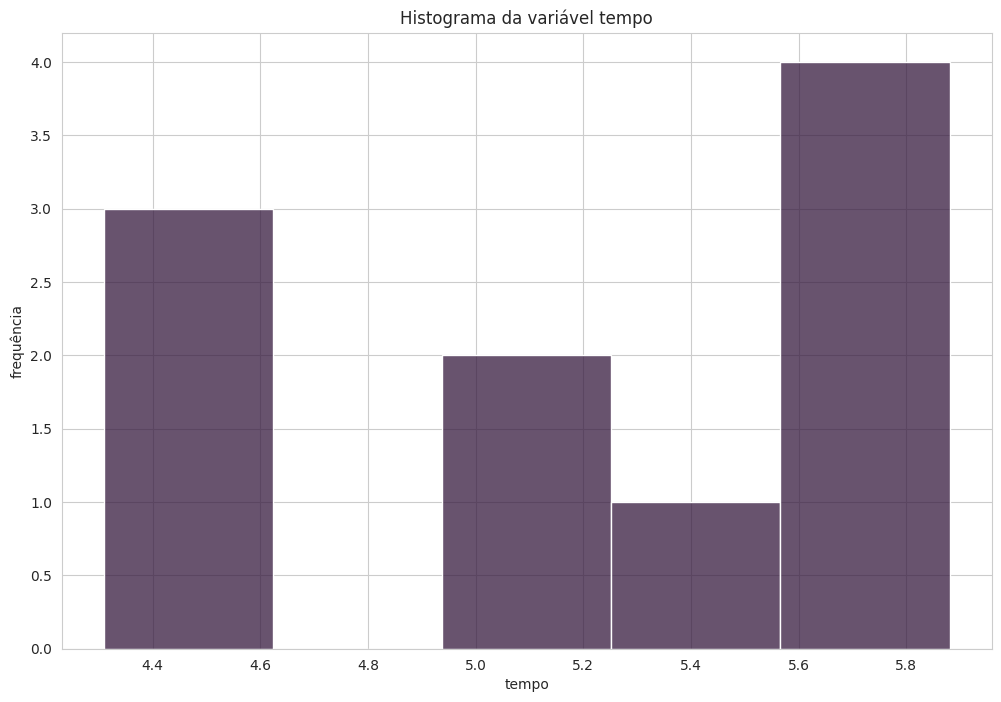

In [48]:
plt.figure(figsize=(12,8))
sns.set_style("whitegrid")
sns.set_palette('rocket');
sns.histplot(df1['tempo'], discrete= False )
plt.title('Histograma da variável tempo')
plt.ylabel('frequência')
#plt.xlim((4,6))
plt.show()

In [52]:
tabela_f_volume = pd.DataFrame(df1['volume'].value_counts())
display(tabela_f_volume)

,count
volume,
10.0,4
11.5,1
8.5,1
11.0,1
8.0,1
9.0,1
10.5,1


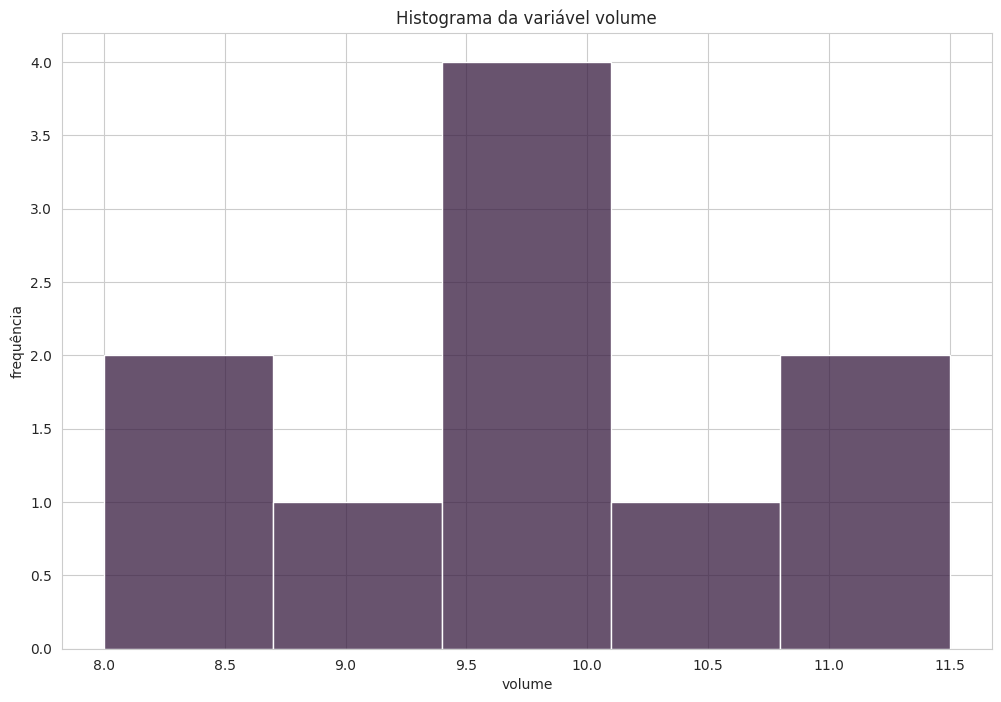

In [49]:
plt.figure(figsize=(12,8))
sns.set_style("whitegrid")
sns.set_palette('rocket');
sns.histplot(df1['volume'], discrete= False )
plt.title('Histograma da variável volume')
plt.ylabel('frequência')
#plt.xlim((7,12))
plt.show()